# Sprint 13　TensorFlow

# ライブラリのimport

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.datasets import mnist
%matplotlib inline
# tensorflow1系
# import tensorflow as tf
# tensorflow2系
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

Using TensorFlow backend.


# データの読み込み

In [2]:
# 読み込み
iris_dataset = load_iris()

# 整形
iris_dataframe = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
iris_datalabel = pd.DataFrame(data=iris_dataset.target,columns=['Species'])
df = pd.concat([iris_dataframe,iris_datalabel],axis=1)

# ミニバッチクラス

In [3]:
class GetMiniBatch:#X, yの両方を入れる

    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

# 問題2　スクラッチとTensorFlowの対応を考える

## データ準備

In [4]:
# 2値分類のため絞り込み
df2 = df[(df["Species"] == 0)|(df["Species"] == 1)]

# 説明変数と目的変数に分割
y = df2["Species"]
X = df2.loc[:, ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = np.array(y)
X = np.array(X)
y = y.astype(np.int)[:, np.newaxis]

# 訓練データ/テストデータ/評価データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print("X_train:{}".format(X_train)) #------検証中--------
print("X_val:{}".format(X_val)) #------検証中--------
print("y_train:{}".format(y_train)) #------検証中--------
print("y_val:{}".format(y_val)) #------検証中--------

# 正規化
X_train /= 255#★☆★☆これは何を表してるのか謎
X_test /= 255
X_val /= 255
print("X_train正規化:{}".format(X_train)) #------検証中--------
print("X_test正規化:{}".format(X_test)) #------検証中--------
print("X_val正規化:{}".format(X_val)) #------検証中--------


X_train:[[6.1 2.8 4.  1.3]
 [4.4 3.2 1.3 0.2]
 [5.7 2.8 4.1 1.3]
 [5.1 3.5 1.4 0.3]
 [5.6 3.  4.5 1.5]
 [5.1 3.3 1.7 0.5]
 [5.4 3.4 1.5 0.4]
 [5.1 3.8 1.9 0.4]
 [5.6 2.5 3.9 1.1]
 [6.3 3.3 4.7 1.6]
 [5.  3.  1.6 0.2]
 [5.5 2.4 3.7 1. ]
 [4.6 3.4 1.4 0.3]
 [5.4 3.4 1.7 0.2]
 [6.  2.7 5.1 1.6]
 [4.8 3.  1.4 0.3]
 [4.9 3.1 1.5 0.2]
 [6.2 2.9 4.3 1.3]
 [4.4 3.  1.3 0.2]
 [5.5 2.4 3.8 1.1]
 [5.6 2.7 4.2 1.3]
 [4.5 2.3 1.3 0.3]
 [5.  2.  3.5 1. ]
 [5.2 2.7 3.9 1.4]
 [4.9 2.4 3.3 1. ]
 [4.9 3.6 1.4 0.1]
 [6.  2.2 4.  1. ]
 [5.1 3.5 1.4 0.2]
 [5.7 2.9 4.2 1.3]
 [6.4 3.2 4.5 1.5]
 [5.1 2.5 3.  1.1]
 [6.4 2.9 4.3 1.3]
 [5.4 3.9 1.7 0.4]
 [5.5 2.5 4.  1.3]
 [5.  3.6 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.1 2.9 4.7 1.4]
 [5.  3.5 1.6 0.6]
 [4.6 3.2 1.4 0.2]
 [5.2 3.5 1.5 0.2]
 [5.3 3.7 1.5 0.2]
 [6.7 3.  5.  1.7]
 [5.7 3.8 1.7 0.3]
 [4.7 3.2 1.6 0.2]
 [4.9 3.  1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.8 2.7 3.9 1.2]
 [6.2 2.2 4.5 1.5]
 [5.7 4.4 1.5 0.4]
 [5.  3.2 1.2 0.2]
 [5.2 4.1 1.5 0.1]
 [6.9 3.1 4.9 1.5]
 [6.

C:\Users\Owner\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


## tensorflowで学習

In [5]:
# 各種変数定義
learning_rate = 0.01
batch_size = 10
num_epochs = 100
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

# 空配列定義
X = tf.placeholder("float", [None, n_input])#n_inputはX_trainの特徴量の数
Y = tf.placeholder("float", [None, n_classes])#n_classesは

# ミニバッチイテレータ生成
# インスタンス化 get_mini_batch_trainにGetMiniBatchのリターンのX[p0:p1]＆y[p0:p1]が入ってくる。
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

def example_net(x):
    """tensorflowを利用したニューラルネットワーク
    Parameters
    ---------------
    x : 入力配列
    """
    # 重み定義#なんで３つと決めれた？入力層と出力層を除いた層の数自分で決めていい？何が違う？
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    # バイアス定義
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }
    # 計算グラフ構築（順伝播処理）

    #第１層の内積とバイアスはw１ * X + b１ で求められる。
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    #ＬｅＬＵにlayer_1を代入
    layer_1 = tf.nn.relu(layer_1)

    #第２層の内積とバイアスはw２ * X + b２ で求められる。
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    #ＬｅＬＵにlayer_２を代入
    layer_2 = tf.nn.relu(layer_2)

    #
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3']
    return layer_output

# 計算グラフ受け取る
logits = example_net(X)



# 損失定義
## tf.reduce_mean：与えたリストに入っている数値の平均値を求める関数
###★☆★☆tf.nn.sigmoid_cross_entropy_with_logitsの(labels=Y, logits=logits)は何でどうなる？
loss_op = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=logits))#labels=Y, logits=logitsは何？



# 最適化手法の定義（勾配降下法みたいなものパラメータの最適化を行う）
## tf.train.AdamOptimizerの使い方：初期値として学習率を指定し、値を最小化するため「minimize()」関数に損失関数を渡す。
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)



# 最適化手法で、定義した損失を最小化するルールを作成
train_op = optimizer.minimize(loss_op)



# ACC計算
correct_pred = tf.equal(tf.sign(Y - 0.5), tf.sign(tf.sigmoid(logits) - 0.5))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))



# 変数を扱うためのおまじない
init = tf.global_variables_initializer()



# tensorflowのセッション開始
with tf.Session() as sess:
    # 初期化
    sess.run(init)
    # 学習回数分ループ
    for epoch in range(num_epochs):
        # ミニバッチイテレータでループ
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            # 「最適化手法で、定義した損失を最小化するルール」を実行
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
        # 記録
        train_loss, train_acc = sess.run([loss_op, accuracy], feed_dict={X: X_train, Y: y_train})
        val_loss, val_acc = sess.run([loss_op, accuracy], feed_dict={X: X_val, Y: y_val})
        # 仮定出力
        print("Epoch {}, train_loss : {:.4f}, val_loss : {:.4f}, train_acc : {:.3f}, val_acc : {:.3f}".format(epoch, train_loss, val_loss, train_acc, val_acc))
    
    # 学習が終了したらテストデータで実行
    test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    #prediction = sess.run(logits, feed_dict={X: X_test, Y: y_test})
    #print(prediction)
    print("test_acc : {:.3f}".format(test_acc))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\Owner\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


Epoch 0, train_loss : 0.9474, val_loss : 0.6882, train_acc : 0.469, val_acc : 0.625
Epoch 1, train_loss : 1.4292, val_loss : 0.9889, train_acc : 0.469, val_acc : 0.625
Epoch 2, train_loss : 0.7078, val_loss : 0.5569, train_acc : 0.469, val_acc : 0.625
Epoch 3, train_loss : 0.5957, val_loss : 0.5214, train_acc : 0.594, val_acc : 0.812
Epoch 4, train_loss : 0.6973, val_loss : 0.5357, train_acc : 0.469, val_acc : 0.625
Epoch 5, train_loss : 0.8710, val_loss : 0.6199, train_acc : 0.469, val_acc : 0.625
Epoch 6, train_loss : 0.7657, val_loss : 0.5553, train_acc : 0.469, val_acc : 0.625
Epoch 7, train_loss : 0.6617, val_loss : 0.4963, train_acc : 0.469, val_acc : 0.625
Epoch 8, train_loss : 0.6621, val_loss : 0.4893, train_acc : 0.469, val_acc : 0.625
Epoch 9, train_loss : 0.6988, val_loss : 0.5018, train_acc : 0.469, val_acc : 0.625
Epoch 10, train_loss : 0.6919, val_loss : 0.4923, train_acc : 0.469, val_acc : 0.625
Epoch 11, train_loss : 0.6489, val_loss : 0.4635, train_acc : 0.469, val_ac

# 問題3　3種類すべての目的変数を使用したIrisのモデルを作成

## データ準備

In [6]:
# 説明変数と目的変数に分割
y = df["Species"]
X = df.loc[:, ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = np.array(y)
X = np.array(X)
y = y.astype(np.int)[:, np.newaxis]

# 訓練データ/テストデータ/評価データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# onehotベクトル化
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train)
y_val_one_hot = enc.transform(y_val)
y_test_one_hot = enc.transform(y_test)

# 正規化
X_train /= 255
X_test /= 255
X_val /= 255

C:\Users\Owner\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


## tensorflowで学習

In [7]:
# 各種変数定義
learning_rate = 0.01
batch_size = 10
num_epochs = 100
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3 # 2値分類からの変更箇所

# 空配列定義
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# ミニバッチイテレータ生成
## インスタンス化 GetMiniBatchにリターンのX[p0:p1]＆y[p0:p1]が入っている。
get_mini_batch_train = GetMiniBatch(X_train, y_train_one_hot, batch_size=batch_size)

def example_net(x):
    """tensorflowを利用したニューラルネットワーク
    Parameters
    ---------------
    x : 入力配列
    """
    # 重み定義
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    # バイアス定義
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }
    # 計算グラフ構築（順伝播処理）
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3']
    return layer_output

# 計算グラフ受け取る
logits = example_net(X)
# 損失定義
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=logits)) # 2値分類からの変更箇所
# 最適化手法の定義
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
# 最適化手法で、定義した損失を最小化するルールを作成
train_op = optimizer.minimize(loss_op)
# ACC計算
correct_pred = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1)) # 2値分類からの変更箇所
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# 変数を扱うためのおまじない
init = tf.global_variables_initializer()

# tensorflowのセッション開始
with tf.Session() as sess:
    # 初期化
    sess.run(init)
    # 学習回数分ループ
    for epoch in range(num_epochs):
        # ミニバッチイテレータでループ
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            # 「最適化手法で、定義した損失を最小化するルール」を実行
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
        # 記録
        train_loss, train_acc = sess.run([loss_op, accuracy], feed_dict={X: X_train, Y: y_train_one_hot})
        val_loss, val_acc = sess.run([loss_op, accuracy], feed_dict={X: X_val, Y: y_val_one_hot})
        # 仮定出力
        print("Epoch {}, train_loss : {:.4f}, val_loss : {:.4f}, train_acc : {:.3f}, val_acc : {:.3f}".format(epoch, train_loss, val_loss, train_acc, val_acc))
    
    # 学習が終了したらテストデータで実行
    test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test_one_hot})
    #prediction = sess.run(logits, feed_dict={X: X_test, Y: y_test})
    #print(prediction)
    print("test_acc : {:.3f}".format(test_acc))

C:\Users\Owner\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


Epoch 0, train_loss : 2.7265, val_loss : 2.6540, train_acc : 0.323, val_acc : 0.333
Epoch 1, train_loss : 2.5269, val_loss : 2.4728, train_acc : 0.323, val_acc : 0.333
Epoch 2, train_loss : 2.1484, val_loss : 2.0570, train_acc : 0.323, val_acc : 0.333
Epoch 3, train_loss : 2.2941, val_loss : 2.2640, train_acc : 0.323, val_acc : 0.333
Epoch 4, train_loss : 2.0610, val_loss : 2.0546, train_acc : 0.365, val_acc : 0.333
Epoch 5, train_loss : 1.4613, val_loss : 1.4399, train_acc : 0.417, val_acc : 0.500
Epoch 6, train_loss : 0.9523, val_loss : 0.9100, train_acc : 0.354, val_acc : 0.333
Epoch 7, train_loss : 1.3355, val_loss : 1.3252, train_acc : 0.604, val_acc : 0.625
Epoch 8, train_loss : 1.0278, val_loss : 1.0178, train_acc : 0.490, val_acc : 0.583
Epoch 9, train_loss : 0.8405, val_loss : 0.8240, train_acc : 0.615, val_acc : 0.583
Epoch 10, train_loss : 1.0391, val_loss : 1.0321, train_acc : 0.375, val_acc : 0.417
Epoch 11, train_loss : 0.8184, val_loss : 0.8051, train_acc : 0.531, val_ac

# 問題4　House Pricesのモデルを作成

## データ準備

In [8]:
dataset_path ="train.csv"
df = pd.read_csv(dataset_path)

y = df["SalePrice"]
X = df.loc[:, ["GrLivArea", "YearBuilt"]]
y = np.array(y)
X = np.array(X)
y = y.astype(np.int)[:, np.newaxis]
y = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

C:\Users\Owner\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


## tensorflowで学習

C:\Users\Owner\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


Epoch 0, loss : 5906825.5000, val_loss : 7989858.0000
Epoch 1, loss : 1665153.8750, val_loss : 1736107.7500
Epoch 2, loss : 987193.3125, val_loss : 834178.5000
Epoch 3, loss : 669414.0000, val_loss : 546524.0625
Epoch 4, loss : 484437.8125, val_loss : 427907.2188
Epoch 5, loss : 359385.5312, val_loss : 359361.3750
Epoch 6, loss : 267373.3125, val_loss : 303999.8438
Epoch 7, loss : 204910.6562, val_loss : 258346.3281
Epoch 8, loss : 159016.0000, val_loss : 215073.6250
Epoch 9, loss : 122737.8984, val_loss : 173614.9219


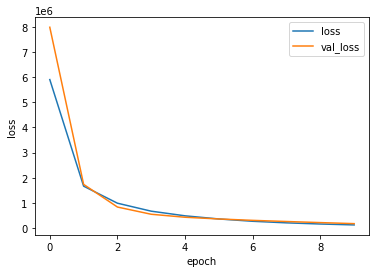

test_mse : 799220.438


In [9]:
# 各種変数定義
learning_rate = 0.001
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

# 空配列定義
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# ミニバッチイテレータ生成
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

def example_net(x):
    """tensorflowを利用したニューラルネットワーク
    Parameters
    ---------------
    x : 入力配列
    """
    # 重み定義
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    # バイアス定義
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }
    # 計算グラフ構築（順伝播処理）
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3']
    return layer_output

# 計算グラフ受け取る
logits = example_net(X)
# 損失定義
loss_op =  tf.losses.mean_squared_error(labels=Y, predictions=logits)
# 最適化手法の定義
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
# 最適化手法で、定義した損失を最小化するルールを作成
train_op = optimizer.minimize(loss_op)

# 変数を扱うためのおまじない
init = tf.global_variables_initializer()

# tensorflowのセッション開始
with tf.Session() as sess:
    # 初期化
    sess.run(init)
    # 損失記録用リスト
    loss_list = []
    val_loss_list = []
    # 学習回数分ループ
    for epoch in range(num_epochs):
        # ミニバッチイテレータでループ
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            # 「最適化手法で、定義した損失を最小化するルール」を実行
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
        # 損失計算と格納
        loss = sess.run(loss_op, feed_dict={X: X_train, Y: y_train})
        val_loss = sess.run(loss_op, feed_dict={X: X_val, Y: y_val})
        loss_list.append(loss)
        val_loss_list.append(val_loss)    
        print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}".format(epoch, loss, val_loss))
    
    # 学習過程可視化
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(loss_list, label='loss')
    plt.plot(val_loss_list, label='val_loss')
    plt.legend()
    plt.show()
    # テストデータに適用
    test_loss = sess.run(loss_op, feed_dict={X: X_test, Y: y_test})
    print("test_mse : {:.3f}".format(test_loss))

# 問題5　MNISTのモデルを作成

# データ準備

In [10]:
# 読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#　平滑化
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# 正規化
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

# 変形
y_train = y_train.astype(np.int)[:, np.newaxis]
y_test = y_test.astype(np.int)[:, np.newaxis]

# one-hotベクトル化
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:])
y_test_one_hot = enc.fit_transform(y_test[:])

# 分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)

C:\Users\Owner\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
C:\Users\Owner\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Owner

## tensorflowで学習

In [11]:
# 各種変数定義
learning_rate = 0.003
batch_size = 1
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 10 # 2値分類からの変更箇所

# 空配列定義
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# ミニバッチイテレータ生成
get_mini_batch_train = GetMiniBatch(X_train[:1000], y_train[:1000], batch_size=batch_size)

def example_net(x):
    """tensorflowを利用したニューラルネットワーク
    Parameters
    ---------------
    x : 入力配列
    """
    # 重み定義
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    # バイアス定義
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }
    # 計算グラフ構築（順伝播処理）
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3']
    return layer_output

# 計算グラフ受け取る
logits = example_net(X)
# 損失定義
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=logits)) # 2値分類からの変更箇所
# 最適化手法の定義
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
# 最適化手法で、定義した損失を最小化するルールを作成
train_op = optimizer.minimize(loss_op)
# ACC計算
correct_pred = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1)) # 2値分類からの変更箇所
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# 変数を扱うためのおまじない
init = tf.global_variables_initializer()

# tensorflowのセッション開始
with tf.Session() as sess:
    # 初期化
    sess.run(init)
    # 学習回数分ループ
    for epoch in range(num_epochs):
        # ミニバッチイテレータでループ
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            # 「最適化手法で、定義した損失を最小化するルール」を実行
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
        # 記録
        train_loss, train_acc = sess.run([loss_op, accuracy], feed_dict={X: X_train, Y: y_train})
        val_loss, val_acc = sess.run([loss_op, accuracy], feed_dict={X: X_val, Y: y_val})
        # 仮定出力
        print("Epoch {}, train_loss : {:.4f}, val_loss : {:.4f}, train_acc : {:.3f}, val_acc : {:.3f}".format(epoch, train_loss, val_loss, train_acc, val_acc))
    
    # 学習が終了したらテストデータで実行
    test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test_one_hot})
    #prediction = sess.run(logits, feed_dict={X: X_test, Y: y_test})
    #print(prediction)
    print("test_acc : {:.3f}".format(test_acc))

C:\Users\Owner\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


Epoch 0, train_loss : 32.3239, val_loss : 31.4053, train_acc : 0.600, val_acc : 0.606
Epoch 1, train_loss : 22.5284, val_loss : 22.3642, train_acc : 0.646, val_acc : 0.643
Epoch 2, train_loss : 18.5634, val_loss : 18.2412, train_acc : 0.687, val_acc : 0.685
Epoch 3, train_loss : 16.4376, val_loss : 16.3740, train_acc : 0.700, val_acc : 0.697
Epoch 4, train_loss : 17.0371, val_loss : 17.0895, train_acc : 0.708, val_acc : 0.708
Epoch 5, train_loss : 15.4541, val_loss : 15.3585, train_acc : 0.744, val_acc : 0.744
Epoch 6, train_loss : 16.9310, val_loss : 16.9756, train_acc : 0.744, val_acc : 0.738
Epoch 7, train_loss : 16.6295, val_loss : 16.8168, train_acc : 0.753, val_acc : 0.753
Epoch 8, train_loss : 16.2811, val_loss : 16.0743, train_acc : 0.769, val_acc : 0.763
Epoch 9, train_loss : 16.7202, val_loss : 16.4293, train_acc : 0.774, val_acc : 0.778
Epoch 10, train_loss : 16.2536, val_loss : 16.6894, train_acc : 0.780, val_acc : 0.776
Epoch 11, train_loss : 16.8444, val_loss : 16.5402, t